<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_14__mosfet_amplificatore_tensione/Esperienza_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

I condensatori di protezione sono i medesi dell'esperienza 13

# 🟢 Misura delle componenti

- Le capacità per disaccoppiare il segnale sono state misirate con scala da 100nF

- La resistenza al drain con scala 100KΩ

- Le stensioni con scala 10V

Tutte le misure sono state fatte con il Metrix


In [2]:
c1 = 96.6 - 0.027 #nF a cui è stato tolto il vuoto
err_c1 = math.sqrt( (c1*1/100)**2 + (0.8)**2 )
print("c1 nF")
print(c1, " \pm ", err_c1)

c2 = 95.6 - 0.028 #nf a cui è stato tolto il vuoto
err_c2 = math.sqrt( (c2*1/100)**2 + (0.8)**2 )
print("\n c2 nF")
print(c2, " \pm ", err_c2)

rd = 9.859 #kohm
err_rd = math.sqrt( (rd*0.07/100)**2 + (0.008)**2 )
print("\n rd kohm")
print(rd, " \pm ", err_rd)

vds = 6.03 #V
err_vds = math.sqrt( (vds*0.03/100)**2 + (0.0008)**2 )
print("\n vds V")
print(vds, " \pm ", err_vds)

vgs = 2.45 #V
err_vgs = math.sqrt( (vgs*0.03/100)**2 + (0.0008)**2 )
print("\n vgs V")
print(vgs, " \pm ", err_vgs)

c1 nF
96.573  \pm  1.2540472211603517

 c2 nF
95.57199999999999  \pm  1.2463549728708911

 rd kohm
9.859  \pm  0.010565412518685676

 vds V
6.03  \pm  0.0019779992416580953

 vgs V
2.45  \pm  0.0010863816088281318


# 🟠 Analisi amplificazione

Guadiamo il segnale della prima misura ($V_{in} = 100 mV$)

L'onda in ingresso è di 2KHz

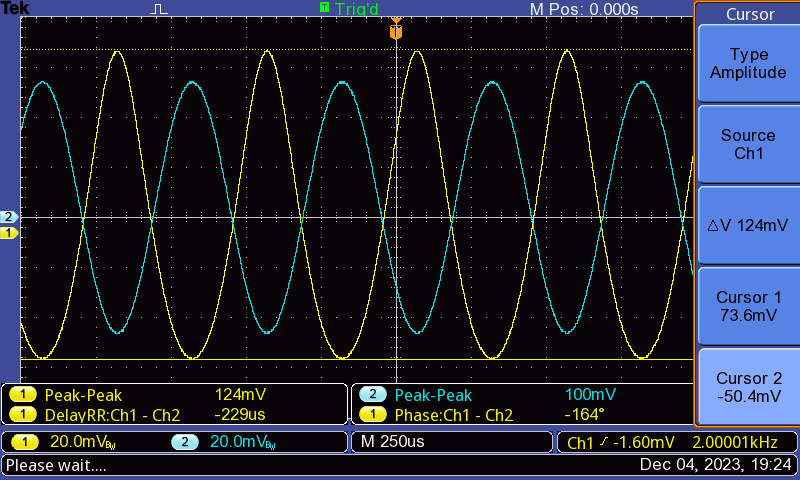

In [7]:
#Dati amplificazione

v_seno = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.3, 1.5, 1.7 ] #V
v_out = [ (0.0736+0.0504) , (0.22+0.118) , (0.544+0.224) , (0.88+0.352) , (1.22+0.48) , (1.52+0.64) , (1.82+0.78) , (2.10+0.92) , (2.36+1.04) , (2.84+1.32) , (3.20+1.52) , (3.44+1.72) , (3.60+1.88) ] #V
scala_v_out = [ 0.02 , 0.05 , 0.2 , 0.2 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 1 , 1 , 1 , 1 ] #V

#calcoliamo l'errore sulle vout
err_v_out = []

for i in range(len(v_out)):
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( (v_out[i]*3/100)**2 + (0.1*scala_v_out[i])**2 ) #ipotesi uniforme
  err_v_out.append(dummy)

print("vout")
print(v_out)
print("errore vout")
print(err_v_out)

vout
[0.124, 0.33799999999999997, 0.768, 1.232, 1.7, 2.16, 2.6, 3.02, 3.4, 4.16, 4.720000000000001, 5.16, 5.48]
errore vout
[0.0024384694653272433, 0.006527368024964834, 0.017614781671463697, 0.024262739608983428, 0.041235098318463274, 0.047254770482283937, 0.053491432335780034, 0.05974490215351711, 0.06558455102639137, 0.09233099876711685, 0.10008423119219799, 0.10640025062627123, 0.11109659460727558]


Il range lineare che abbiamo individuato è tra 0.2 e 1.0 V per l'onda seno in ingresso

In [15]:
x_fit = v_seno[1:9]
y_fit = v_out[1:9]
err_y_fit = err_v_out[1:9]


regrlin_pear_errpost_xys(x_fit, y_fit, err_y_fit)

pendenza $b$	 4.469574378775169
$\sigma_b$	 0.04712412903650365
intercetta $a$	 -0.5569945845387396
$\sigma_a$	 0.013119616661936956
Coefficiente di Pearson $\rho_{xy}$	 0.9996006855265499
$\sigma_{\rho_{xy}}$	 0.011535954626380926
Errore a posteriori $\delta$	 0.03439693669972424


chi quadro 
 2.9700615236495453
NDOF  
 6


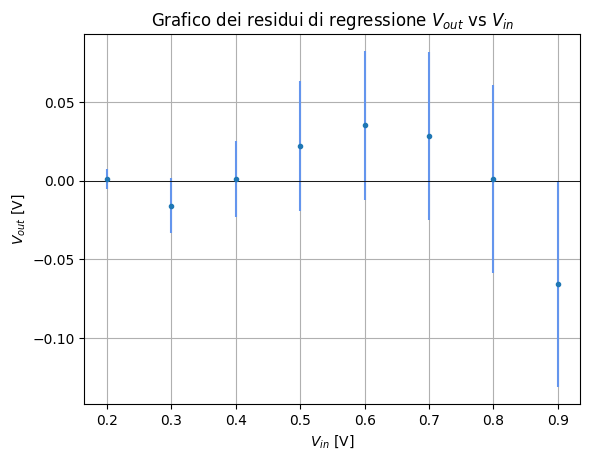

In [16]:
chi_quadro_lineare(y_fit, x_fit, err_y_fit, -0.5569945845387396, 4.469574378775169, "$V_{out}$ [V]", "$V_{in}$ [V]", "$V_{out}$ vs $V_{in}$")

Possiamo vedere che i residui hanno un trend e un chi quadro piccolo

**Grafico finale**

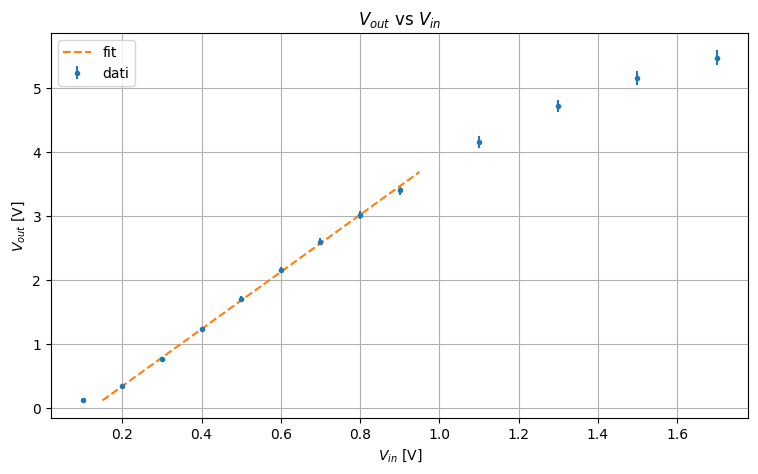

In [18]:
plt.figure(figsize=(9,5))
plt.errorbar(v_seno, v_out, yerr=err_v_out, marker=".", linestyle="", label="dati")

plt.plot( np.linspace(0.15, 0.95, 100) , retta_fit_xba(np.linspace(0.15, 0.95, 100), 4.469574378775169,-0.5569945845387396) , marker="", linestyle="--", label="fit"  )

plt.title("$V_{out}$ vs $V_{in}$")
plt.ylabel("$V_{out}$ [V]")
plt.xlabel("$V_{in}$ [V]")
plt.grid()
plt.legend()

# ⏳Simulazione

# 📚 Librerie

In [10]:
def regrlin_pear_errpost_xys(input_x, input_y, input_sigma) :
  import math
  import sys
  #dati input
  x = list(input_x)
  y = list(input_y)
  sigma = list(input_sigma)
  dimensione = len(x)
  if len(x) != len(y):
    print("X E Y DIMENSIONE DIVERSA")
    sys.exit()
  if len(x) != len(sigma):
    print("X E SIGMA DIMENSIONE DIVERSA")
    sys.exit()
  #REGRESSIOBNE LINEARE
  #calcolo del delta
  parametro_1 = 0
  parametro_2 = 0
  parametro_3 = 0
  for i in range(dimensione): #primo termine del delta
    dummy_1 = 0
    dummy_1 = 1/ pow(sigma[i],2)
    parametro_1 = dummy_1 + parametro_1
  for i in range(dimensione): #secondo termine del delta
    dummy_2 = 0
    dummy_2 = pow(x[i],2) / pow(sigma[i],2)
    parametro_2 = dummy_2 + parametro_2
  dummy_3_1 = 0
  for i in range(dimensione): #terzo termine del delta
    dummy_3 = 0
    dummy_3 = x[i] / pow(sigma[i],2)
    dummy_3_1 = dummy_3 + dummy_3_1
  parametro_3 = pow(dummy_3_1,2)
  delta = (parametro_1*parametro_2) - parametro_3
  delta_1 = 1/delta
  #calcolo di b
  parametro_4 = 0
  parametro_5 = 0
  parametro_6 = 0
  parametro_7 = 0
  for i in range(dimensione): #calcolo del primo termine di a
    dummy_4 = 0
    dummy_4 = 1/pow(sigma[i],2)
    parametro_4 = dummy_4 + parametro_4
  for i in range(dimensione): #calcolo del secondo termine di a
    dummy_5 = 0
    dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
    parametro_5 = dummy_5 + parametro_5
  for i in range(dimensione): #calcolo del terzo termine di a
    dummy_6 = 0
    dummy_6 = x[i] / pow(sigma[i],2)
    parametro_6 = dummy_6 + parametro_6
  for i in range(dimensione): #calcolo del quarto termine di a
    dummy_7 = 0
    dummy_7 = y[i] / pow(sigma[i],2)
    parametro_7 = dummy_7 + parametro_7
  dummy_b1 = delta_1*parametro_4*parametro_5
  dummy_b2 = delta_1*parametro_6*parametro_7
  b = dummy_b1-dummy_b2
	#calcolo di a
  parametro_8 = parametro_2
  parametro_9 = parametro_7
  parametro_10 = parametro_6
  parametro_11 = parametro_5
  dummy_a1 = delta_1*parametro_8*parametro_9
  dummy_a2 = delta_1*parametro_10*parametro_11
  a = dummy_a1-dummy_a2
  #calcolo incertezza e covarianza
  #sigma b
  sigma_b = math.sqrt(delta_1*parametro_1)
  #sigma a
  sigma_a = math.sqrt(delta_1*parametro_8)
  #covrianza
  #al mmento non disponibile
  #COEFFICIENTE DI CORRELLAZIONE DI PEARSON
  media_x = sum(x) / dimensione
  media_y = sum(y) / dimensione
  numeratore = 0
  denominatore = 0
  dummy_denx = 0
  dummy_deny = 0
  for i in range(dimensione):
    dummy_x = x[i]-media_x
    dummy_y = y[i]-media_y
    dummy_numeratore = dummy_x*dummy_y
    numeratore = dummy_numeratore + numeratore
    dummy_x2 = pow(dummy_x,2)
    dummy_y2 = pow(dummy_y,2)
    dummy_denx = dummy_x2 + dummy_denx
    dummy_deny = dummy_y2 + dummy_deny
  dummy_denominatore = dummy_denx * dummy_deny
  denominatore = math.sqrt(dummy_denominatore)
  rxy = numeratore / denominatore
  numeratore_sigma = 1 - pow(rxy,2)
  denominatore_sigma = dimensione - 2
  sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)
  #ERRORE A POSTERIORI
  parametro_12 = 1 / (dimensione - 2)
  y_riferimento = []
  for i in range(dimensione):
    dummy_y = 0
    dummy_y = a + (b*x[i])
    y_riferimento.append(dummy_y)
  scarti_quadrati = 0
  for i in range(dimensione):
    dummy_sq = y[i] - y_riferimento[i]
    dummy_sq2 = pow(dummy_sq,2)
    scarti_quadrati = dummy_sq2 + scarti_quadrati
  errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)
  #print dei risultati
  print("pendenza $b$\t", b)
  print("$\sigma_b$\t", sigma_b)
  print("intercetta $a$\t", a)
  print("$\sigma_a$\t", sigma_a)
  #print("covarianza", )
  print("Coefficiente di Pearson $\\rho_{xy}$\t",  rxy)
  print("$\sigma_{\\rho_{xy}}$\t", sigma_rxy)
  print("Errore a posteriori $\delta$\t",  errore_posteriori)

In [11]:
def retta_fit_xba(x, b,a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*b) + a
    y.append(dummy)
  return y

def retta_fit_xa(x, a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*0) + a
    y.append(dummy)
  return y

In [12]:
def chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle, stringa_xtitle, stringa_titolo):

	import math
	import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
	y = list(y_vec)
	x = list(x_vec)
	sigma = list(sigma_vec)
	intercetta = inte
	pendenza = pend
	dimensione = len(y)

#calcolo del riferimento
	y_ref = []
	for i in x:
		dummy_1 = 0
		dummy_1 = (i*pendenza) + intercetta
		y_ref.append(dummy_1)

#calcolo del chi quadro
	vettore_scarti_quadratici = []
	vettore_scarti = []
	for i in range(dimensione):
		dummy_2 = 0
		dummy_3 = 0
		dummy_4 = 0
		dummy_2 = y[i] - y_ref[i]
		dummy_3 = dummy_2 / sigma[i]
		dummy_4 = dummy_3**2
		vettore_scarti_quadratici.append(dummy_4)
		vettore_scarti.append(dummy_2)

	chi_quadro = sum(vettore_scarti_quadratici)
	print("chi quadro \n", chi_quadro)
	print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
	ascisse = x

	plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue")
	plt.title("Grafico dei residui di regressione " + stringa_titolo )
	plt.ylabel(stringa_ytitle)
	plt.xlabel(stringa_xtitle)
	plt.axhline(0, color='black', linewidth="0.6")
	plt.grid()